#  Execute parameters :
let's see in the transpile section to understand<a href="./Transpile.ipynb">click</a>

    1. optimization level
    2. initial layout

In [1]:
from qiskit import QuantumCircuit, Aer,execute, IBMQ,transpile
from qiskit.visualization import *
from qiskit.test.mock import FakeVigo

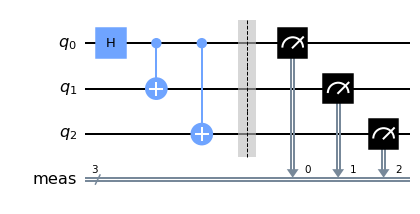

In [2]:
qc=QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure_all()
qc.draw(output="mpl")

In [3]:
qc.depth()

4

In [4]:
# on the ideal simulator
backend=Aer.get_backend('qasm_simulator')
job=execute(qc,backend,shots=1024)
result=job.result()
counts=result.get_counts()
print(counts)

{'111': 516, '000': 508}


# For testing purpose we will use mock backends available

In [5]:
backend = FakeVigo()
job=execute(qc,backend,shots=1024)
result=job.result()
counts=result.get_counts()
print(counts)

{'001': 8, '100': 9, '110': 18, '111': 427, '011': 18, '101': 26, '010': 22, '000': 496}


In [6]:
transpile_circuit=transpile(qc,backend)
job=backend.run(transpile_circuit)
result=job.result()
counts=result.get_counts()
print(counts)

{'110': 19, '100': 6, '001': 13, '101': 26, '010': 23, '000': 462, '011': 19, '111': 456}


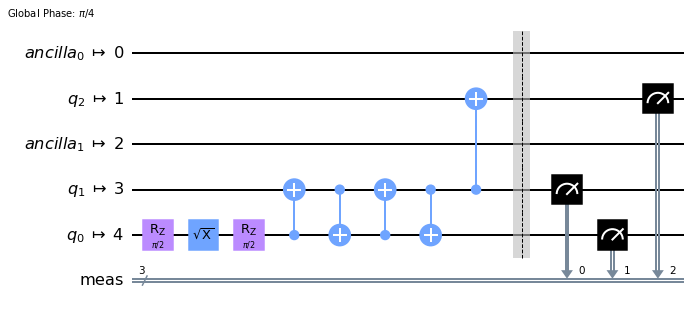

In [7]:
transpile_circuit.draw(output="mpl")

In [8]:
transpile_circuit.depth()

9

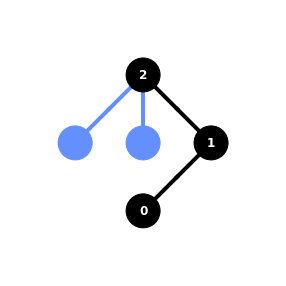

In [9]:
plot_circuit_layout(transpile_circuit, backend)

Now, let's change the optimization level=3

In [14]:
transpile_circuit_new=transpile(qc,backend,optimization_level=2,initial_layout=[0,1,2])
job=backend.run(transpile_circuit_new)
result=job.result()
counts=result.get_counts()
print(counts)

{'001': 3, '100': 4, '110': 17, '111': 430, '011': 11, '010': 42, '000': 473, '101': 44}


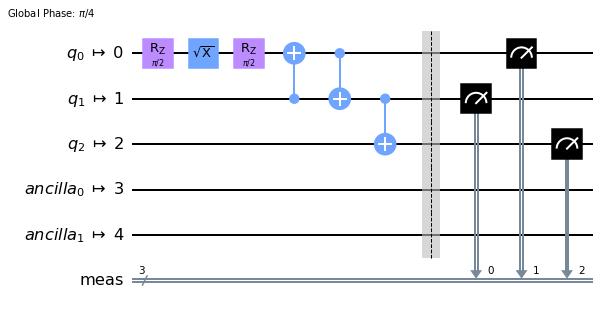

In [15]:
transpile_circuit_new.draw(output="mpl")

In [16]:
transpile_circuit_new.depth()

7

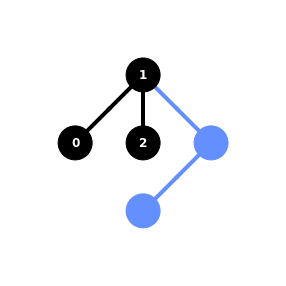

In [17]:
plot_circuit_layout(transpile_circuit_new,backend)